# Hand writing Recignition Using Neural Network

#### Type 1 - Using Simple Neural network with no hidden layers and manually flattening the data.

Steps
- import modules- TensorFlow , Keras , matplotlib for plotting and numpy for array operation
- Download mnist dataset which contains hand written digits from keras datasets
- Extract train and test split from the downloaded dataset
- Normalise the values in dataset i.e Divide by max number 255 in our case which will keep all the values in 0-1 range
- (imp) Flatten x_train and x_test
- Use keras models to create , compile , train and test the model.
- In the below example we only have one dense layer of 784 which is 28*28 which inturn is the length of the flattened array
- Evaluate and test the model using -> model.evaluate which will evaluate model on test dataset.



For simple NN with no hidden layers and with epochs of 5 I got accuracy of 92.52%

---Scroll down to see Type 2 --------

In [65]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [36]:
dataset = keras.datasets.mnist.load_data()
(x_train , y_train) , (x_test , y_test) = dataset

In [37]:
x_train= x_train/255
x_test= x_test/255 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [38]:
x_train_flattened = x_train.reshape(len(x_train) , 28*28) 
x_test_flattened = x_test.reshape(len(x_test) , 28*28)
print(x_train_flattened.shape)

(60000, 784)


In [39]:
model = keras.Sequential([
    keras.layers.Dense(10 , input_shape=(784,) , activation='sigmoid')
])

model.compile(optimizer='adam' , 
             loss='sparse_categorical_crossentropy',
             metrics= ['accuracy']
             )

model.fit(x_train_flattened , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4728 - accuracy: 0.8760
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3046 - accuracy: 0.9143
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2737 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9255


In [40]:
model.evaluate(x_test_flattened , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2712 - accuracy: 0.9251


[0.27115777134895325, 0.9251000285148621]

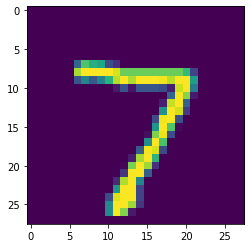

In [41]:
plt.imshow(x_test[0])

In [42]:
y_predicted = model.predict(x_test_flattened)
np.argmax(y_predicted[0])

7

In [45]:
y_predicted_lables  = [np.argmax(i) for i in y_predicted ]
cm = tf.math.confusion_matrix(labels =y_test , predictions =y_predicted_lables)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    1,    0,    5,    6,    2,    3,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   7,   11,  918,   13,    8,    5,   13,    9,   45,    3],
       [   6,    0,   20,  884,    1,   47,    3,   10,   32,    7],
       [   1,    1,    5,    0,  927,    0,   10,    2,   11,   25],
       [  11,    2,    2,   14,    9,  800,   14,    4,   30,    6],
       [   8,    3,    3,    0,    7,   15,  916,    2,    4,    0],
       [   2,    7,   24,    5,    8,    1,    0,  947,    5,   29],
       [   4,    8,    5,   14,    9,   25,    9,    8,  886,    6],
       [  10,    7,    1,    8,   37,    8,    0,   24,   12,  902]])>

-------------------------------------------------------------------------------------------------------------------------------

#### Type 2 - Neural network 11 hidden layer and flattening the data with keras.
Steps 
- Same as the type 1 but here flattening is done using keras library
- Add hidden layer of 100 neurons

For  NN with 1 hidden layer of 100 neurons trained with epochs of 5, I got accuracy of 98.51%

Observation
- The accuracy has increased to from 92.51% to 98.51% which is significant by adding a hidden layer to the Neural Network


In [66]:
dataset2 = keras.datasets.mnist.load_data()
(x_train1 , y_train1) , (x_test1 , y_test1) = dataset

x_train1 = x_train1/255
x_test1 = x_test/255

In [26]:
model1= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10 , activation='sigmoid')
])

model1.compile(optimizer='adam' , 
             loss='sparse_categorical_crossentropy',
             metrics= ['accuracy']
             )
model1.fit(x_train1 , y_train1 , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2634 - accuracy: 0.9267
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1201 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0843 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0641 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0500 - accuracy: 0.9851


In [29]:
model1.evaluate(x_test1 , y_test1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0735 - accuracy: 0.9776


[0.07345819473266602, 0.9775999784469604]

In [105]:
model.evaluate(x_train , y_train)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.2002 - accuracy: 0.9461


[0.2001737803220749, 0.9460999965667725]

In [62]:
y_predicted1 = model1.predict(x_test1)

0

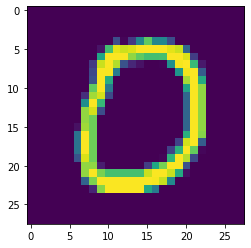

In [63]:
plt.imshow(x_test[10])
np.argmax(y_predicted1[10])

In [64]:
#Confusion Matrix
y1_predicted_lables  = [np.argmax(i) for i in y_predicted1 ]
cm1 = tf.math.confusion_matrix(labels =y_test1 , predictions =y1_predicted_lables)
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    0,    1,    2,    1,    4,    1,    2,    0],
       [   0, 1118,    3,    0,    0,    0,    3,    0,   11,    0],
       [   5,    2,  997,    8,    1,    0,    1,    6,   12,    0],
       [   2,    1,    3,  979,    0,    8,    0,    7,    7,    3],
       [   0,    0,    2,    0,  963,    0,    4,    1,    2,   10],
       [   2,    0,    1,    5,    2,  872,    4,    0,    5,    1],
       [   2,    2,    1,    1,    5,    1,  945,    0,    1,    0],
       [   0,    4,    7,    0,    2,    0,    0, 1007,    2,    6],
       [   5,    0,    1,    1,    5,    1,    3,    4,  949,    5],
       [   1,    4,    0,    6,    7,    1,    2,    6,    5,  977]])>